In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

Vi skal udregne $\frac{d\tau}{da}= \frac{1}{a^2H(a)}$
$H_0 = 70 km/sMpc / (3\cdot 10^5 km/s)$
$a_0 = 10^{-14}$ til $a=1$


In [166]:
H0 = 70 / (3 * 10e5) # i 1/Mpc
a0 = 1e-14
aend = 1
steps = int(1e4)
Omega_lambda = 0.74 - 2 * 1e-5
Omega_M = 0.26- 2 * 1e-5
Omega_R = 4 * 1e-5
a = np.linspace(a0,aend,steps)

# udregning af Friedmanligningen
def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M * a **(-3) + Omega_R * a**(-4)) # a**3 *

def f(t,y):
    a = t
    tau = y[0]
    d_tau = 1 / (a**2 * H(a))
    return np.array(d_tau)

sol1 = sc.solve_ivp(f,t_span=[a0,aend],y0=[1],t_eval=a)
tau =sol1.y[0]
print(f"{tau=}")

tau=array([1.00000000e+00, 5.94299883e+02, 1.07829346e+03, ...,
       1.48029147e+05, 1.48033434e+05, 1.48037721e+05])


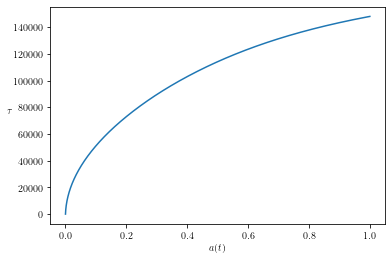

In [169]:
plt.plot(a,tau)
plt.xlabel(r"$a(t)$",rotation=0)
plt.ylabel(r"$\tau$",rotation=0)
plt.show()

success


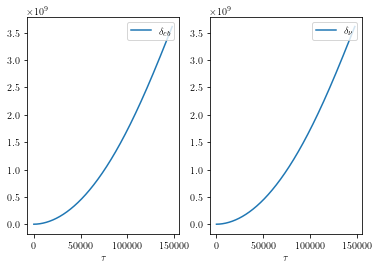

In [208]:
# nu skal jeg bare have nogle start værdier

H0 = 70 / (3*10e5) # i 1/Mpc
cs = 1
a0 = 1e-14
C = 1


# fra ma_bertigner delta_baryoner = delta_Mørkstof = 
#  3/4 delta_ny = 3/4 delta_gamma 

# dette er nok ikke en god ide, da ligng 96 i Ma-Bertinger et resultat ikke en startbetingelse.

"""theta_c = 0
theta_b = -1/18 * C * k**4 * tau[0]
theta_gamma = theta_b
delta_gamma = - 2/3 * C * (k*tau[0])**2
delta_ny_0 = 1 
R_nu = 1
theta_ny_0 =  (23 + 4 * R_nu) / ( 15 + 4 * R_nu) * theta_gamma
theta_cb_0 =  theta_c + theta_b
delta_cb_0 = 3/4 * delta_ny_0 """

# lige inden (92) i MaBeritnger siger de lidt om startbetingelser

theta_ny_0 = 0
#ellers
# siger jeg
delta_ny_0 = 1e-8
delta_cb_0 = 1
theta_cb_0 = 1e-1

y0 = np.array([a0,delta_cb_0,theta_cb_0,delta_ny_0,theta_ny_0])

# poisson ligningen nabla2phi 

k = 1e-8
def f(t,y):
    a = y[0]
    delta_cb = y[1]
    theta_cb = y[2]
    delta_ny = y[3]
    theta_ny = y[4]
    d_a_dtau = a**2 * H(a)
    # poisson
    nabla2phi =(3/2) * H(a) ** 2  * Omega_M * a**2  *  (delta_ny + delta_cb)

    d_delta_cb_dt = - (1/a) * theta_cb
    d_delta_cb_dtau = - theta_cb
    
    d_theta_cb_dt = - H(a) * theta_cb - 1/a * nabla2phi
    d_theta_cb_dtau = - a * H(a) * theta_cb -  nabla2phi
    
    d_delta_ny_dt = - (1/ a) * theta_ny
    d_delta_ny_dtau = - theta_ny
    
    d_theta_ny_dt = - H(a) * theta_ny - k*k * (cs*cs / a) * delta_ny - (1/a) * nabla2phi
    d_theta_ny_dtau = - a * H(a) * theta_ny - k*k * (cs*cs ) * delta_ny - nabla2phi
    
    return [d_a_dtau,d_delta_cb_dtau,d_theta_cb_dtau,d_delta_ny_dtau,d_theta_ny_dtau]
    
t_start = tau[0]
t_end = tau[-1]
t_span = np.array([t_start,t_end])

sol2 = sc.solve_ivp(f,t_span,y0,t_eval = tau)

a        = sol2.y[0]
delta_cb = sol2.y[1]
theta_cb = sol2.y[2]
delta_ny = sol2.y[3]
theta_ny = sol2.y[4]

print("success")
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(tau,delta_cb,label=r"$\delta_{cb}$")
axes[1].plot(tau,delta_ny,label=r"$\delta_{\nu}$")

axes[0].set(xlabel=r"$\tau$")
axes[1].set(xlabel=r"$\tau$")

axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")

# Det er ikke overraskende at de er næsten identiske, da 
# k = 1e-8

plt.show()

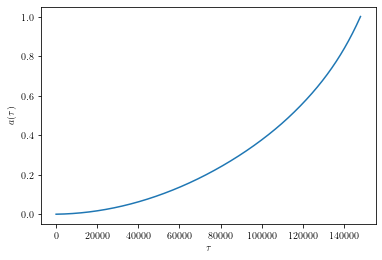

In [204]:
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(tau,a)#,axis=axes[0,0])
axes.set(xlabel=r"$\tau$")
axes.set(ylabel=f"$a(\\tau)$")
plt.show()

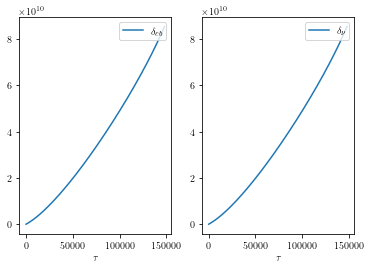

In [205]:
N = 10000
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(tau,delta_cb,label=r"$\delta_{cb}$")
axes[1].plot(tau,delta_ny,label=r"$\delta_{\nu}$")

axes[0].set(xlabel=r"$\tau$")
axes[1].set(xlabel=r"$\tau$")

axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")

# Det er ikke overraskende at de er næsten identiske, da 
# k = 1e-8

plt.show()

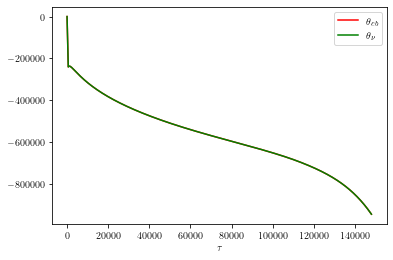

In [206]:
N = 10000
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(tau,theta_cb,label=r"$\theta_{cb}$",color="red")
axes.plot(tau,theta_ny,label=r"$\theta_{\nu}$",color="green")
axes.set(xlabel=r"$\tau$")
plt.legend()

plt.show()

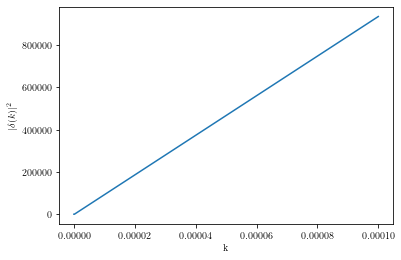

In [201]:
# Dette er mit forsøg på at varriere k - det går ikke så godt
theta_cb_0 = 0
delta_cb_0 = 1
theta_ny_0 = 0
delta_ny_0 = 1e-2

H0 = 70 / (3*10e5) # i 1/Mpc
cs = 1
a0 = 1e-14
t_start = tau[0]
t_end = tau[-1]
t_span = np.array([t_start,t_end])
def f(t,y):
        a = y[0]
        delta_cb = y[1]
        theta_cb = y[2]
        delta_ny = y[3]
        theta_ny = y[4]
        k = y[5]
        d_a_dtau = a**2 * H(a)
        nabla2phi =(3/2) * H(a) ** 2 * a ** 2 * Omega_M * a**3  *  (delta_ny + delta_cb)
        d_delta_cb_dtau = - theta_cb
        d_theta_cb_dtau = - a * H(a) * theta_cb -  nabla2phi
        d_delta_ny_dtau = - theta_ny
        d_theta_ny_dtau = - a * H(a) * theta_ny - k*k * (cs*cs ) * delta_ny - nabla2phi
        return [d_a_dtau,d_delta_cb_dtau,d_theta_cb_dtau,d_delta_ny_dtau,d_theta_ny_dtau,0]

M = 1000
delta_k = np.zeros(M)
#k1 = np.array([i*1e-10 for i in range(M)])
k1 = 1/tau * 1e-4
k2 = np.linspace(k1[0],k1[-1],M)
#print(k1[:10])
i=0
for k in k1[:M]:
    y0 = np.array([a0,delta_cb_0,theta_cb_0,delta_ny_0,theta_ny_0,k])
    sol2 = sc.solve_ivp(f,t_span,y0,t_eval = tau)
    delta_k[i] = sol2.y[3][-1]
    i+= 1
    
    
plt.plot(k1[:M],np.power(np.abs(delta_k),2))
plt.xlabel("k")
plt.ylabel(r"$|\delta(k)|^2$")
plt.show()




In [194]:
# for nu skal jeg bare have nogle startværdier                  
theta_cb_0 = 1#e-0
delta_cb_0 = 1#e-0
theta_ny_0 = 1#e-0
delta_ny_0 = 1#e-0
#a = 1 # find den rigtige start værdi 
H0 = 70 / (3*10e5) # i 1/Mpc
cs = 100
a0 = 1e-14
k = 1e-8
t_start = tau[0]
t_end = tau[-1]
t_span = np.array([t_start,t_end])
def f(t,y):
        a = y[0]
        delta_cb = y[1]
        theta_cb = y[2]
        delta_ny = y[3]
        theta_ny = y[4]
        k = y[5]
        d_a_dtau = a**2 * H(a)
        nabla2phi =(3/2) * H(a) ** 2 * Omega_M * a**2  *  (delta_ny + delta_cb)
        d_delta_cb_dtau = - theta_cb
        d_theta_cb_dtau = - a * H(a) * theta_cb -  nabla2phi
        d_delta_ny_dtau = - theta_ny
        d_theta_ny_dtau = - a * H(a) * theta_ny - k*k * (cs*cs ) * delta_ny - nabla2phi
        return [d_a_dtau,d_delta_cb_dtau,d_theta_cb_dtau,d_delta_ny_dtau,d_theta_ny_dtau,0]
M = 1
delta_k = np.zeros(shape=M)
y0 = np.array([a0,delta_cb_0,theta_cb_0,delta_ny_0,theta_ny_0,k])
sol2 = sc.solve_ivp(f,t_span,y0,t_eval = tau)
delta_k[0] = sol2.y[3][-1]
print(delta_k)

[1.53788244]
